# Compositional analysis

In [8]:
import altair as alt
import scanpy as sc

In [3]:
input_adata = "../../data/input_data_zenodo/atlas-integrated-annotated.h5ad"

In [4]:
adata = sc.read_h5ad(input_adata)

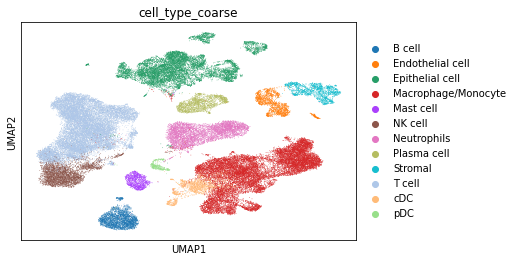

In [5]:
sc.pl.umap(adata, color="cell_type_coarse")

In [14]:
cell_type_fractions = (
    adata.obs.loc[(adata.obs["origin"] == "tumor_primary") & adata.obs["condition"].isin(["LUAD", "LUSC"]), :]
    .groupby(["condition", "patient", "cell_type_coarse"])
    .size()
    .reset_index(name="n")
    .groupby(["condition", "patient"])
    .apply(lambda x: x.assign(frac=x["n"] / x["n"].sum()))
    .dropna()
    .groupby(["condition", "cell_type_coarse"])
    .agg("mean")
    .reset_index()
)

In [15]:
alt.Chart(cell_type_fractions).encode(x="condition", y="frac", color="cell_type_coarse").mark_bar()

alt.Chart(...)